In [63]:
from Transshipment import *

In [62]:
get_problem('problems0', '3X3X2')

([84.0, 85.0, 92.0],
 [41.0, 92.0, 39.0],
 array([[58, 65, 47, 48, 63],
        [40, 59, 59, 44, 64],
        [68, 55, 50, 45, 59],
        [45, 49, 63, 61, 66],
        [51, 55, 69, 54, 57]]),
 array([[17,  8, 14,  8, 17],
        [10, 19, 11, 15, 19],
        [11,  8, 13, 10,  8],
        [14,  9, 16, 15,  5],
        [ 6,  8,  7,  9,  5]]))

In [60]:
folders = [i for i in os.listdir() if 'X'in i]

In [57]:
Supplies, Demands, CostMatrix, Fixed_costs_matrix = get_problem('problems0', '3X3X2')

In [66]:
solution, indexOrderedProduct, Supplies, Demands, CostMatrix, Fixed_costs_matrix = ConfigureProblem(Supplies, Demands, CostMatrix, Fixed_costs_matrix)

In [67]:
output = PCA(0, 1, len(indexOrderedProduct), 100, 100, 1, indexOrderedProduct, solution, CostMatrix, Fixed_costs_matrix, Supplies, Demands)

In [68]:
output

(41719.0,
 array([0.19003015, 0.84437687, 0.85326365, 0.0525446 , 0.4446998 ,
        0.52075898, 0.32715993, 0.53041534, 0.08298934, 0.291172  ,
        0.48826713, 0.53244901, 0.32144328, 0.01235657, 0.68340324,
        0.49377765, 0.72482675, 0.13887959, 0.73408724, 0.85586254,
        0.27367721, 0.81290174, 0.27606839, 0.68010622, 0.21925863,
        0.01721526, 0.78612677, 0.7605037 , 0.14458973, 0.56190132]),
 array([[  0.,   0.,  39.,   0.,  45.,   0.],
        [  0.,   0.,   0.,   0.,  85.,   0.],
        [  0.,   0.,   0.,   0.,  92.,   0.],
        [ 41.,  92.,   0.,  89.,   0.,  39.],
        [  0.,   0.,   0.,   0.,  39., 222.]]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 

In [8]:
import matplotlib.pyplot as plt

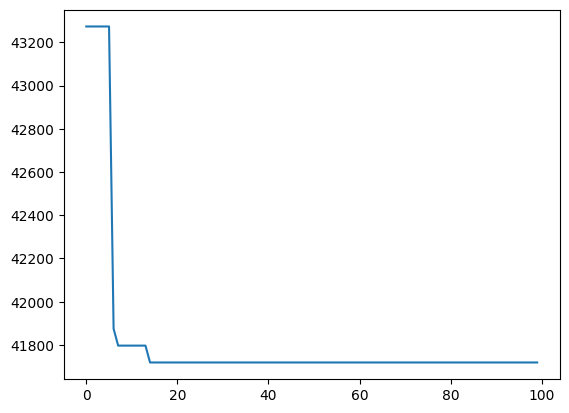

In [8]:
plt.plot(output[-1])

In [82]:
import numpy as np
from FunctionCall import *

class Particle:
    def __init__(self, num_dimensions, lb, ub):
        self.position = np.array([np.random.uniform(0, 1) for _ in range(num_dimensions)])
        self.velocity = np.array([np.random.uniform(-1, 1) for _ in range(num_dimensions)])
        self.best_position = self.position.copy()
        self.best_score = float('inf')



def update_velocity(particle, global_best_position, inertia_weight, personal_weight, global_weight):
    particle.velocity = inertia_weight * particle.velocity + personal_weight * (particle.best_position - particle.position)\
    + global_weight * (global_best_position - particle.position)

def update_position(particle):
    particle.position += np.random.uniform() * particle.velocity

def particle_swarm_optimization(num_particles, max_iterations, inertia_weight, personal_weight, global_weight, lb, ub,\
    indexOrderedProduct, solution, CostMatrix, Fixed_costs_matrix, Supplies, Demands):
    
    particles = [Particle(len(indexOrderedProduct), lb, ub) for _ in range(num_particles)]
    global_best_position = particles[0].best_position
    global_best_score = particles[0].best_score
    convergenceVector = np.array([global_best_score])
    # func1 = generateSolution(particles[0], indexOrderedProduct, solution, CostMatrix, Fixed_costs_matrix, Supplies, Demands)[0]
    sol = generateSolution(particles[0].position.copy(), indexOrderedProduct, solution, CostMatrix, Fixed_costs_matrix, Supplies, Demands)
    global_best_score = sol[1]
    convergenceVector = np.array([global_best_score])
    bestSol = sol[1].copy()
    
    for _ in range(max_iterations):
        for particle in particles:
            sol = generateSolution(particle.position.copy(), indexOrderedProduct, solution, CostMatrix, Fixed_costs_matrix, Supplies, Demands)
            score = sol[1]            
            if score < particle.best_score:
                particle.best_position = particle.position.copy()
                particle.best_score = score

            if score < global_best_score:
                global_best_position = particle.position.copy()
                global_best_score = score

        for particle in particles:
            update_velocity(particle, global_best_position, inertia_weight, personal_weight, global_weight)
            update_position(particle)
        convergenceVector = np.append(convergenceVector, global_best_score)

    return global_best_score, np.array(global_best_position), convergenceVector

In [83]:
PSO_results = particle_swarm_optimization(50, 50, 0.1, 0.1, 0.1, 0, 1,\
    indexOrderedProduct, solution, CostMatrix, Fixed_costs_matrix, Supplies, Demands)

In [84]:
PSO_results

(41797.0,
 array([0.66730098, 0.29685565, 0.48288554, 0.23823347, 0.60652553,
        0.41900892, 0.13437642, 0.47390512, 0.13624983, 0.31524805,
        0.71533057, 0.65769199, 0.42145915, 0.76075973, 0.34024669,
        0.60844615, 0.91202856, 0.50946584, 0.67975655, 0.42360916,
        0.38419436, 0.69758314, 0.13952597, 0.22059375, 0.63062464,
        0.88845598, 0.71598585, 0.54891752, 0.23653531, 0.94450602]),
 array([45120., 43085., 42775., 42775., 42775., 42775., 42775., 42775.,
        42775., 42775., 42775., 42775., 42775., 41797., 41797., 41797.,
        41797., 41797., 41797., 41797., 41797., 41797., 41797., 41797.,
        41797., 41797., 41797., 41797., 41797., 41797., 41797., 41797.,
        41797., 41797., 41797., 41797., 41797., 41797., 41797., 41797.,
        41797., 41797., 41797., 41797., 41797., 41797., 41797., 41797.,
        41797., 41797., 41797.]))

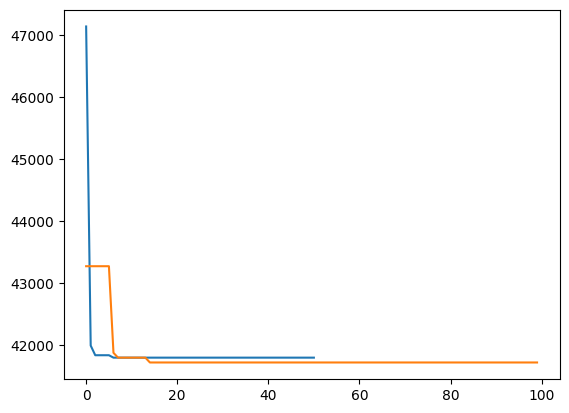

In [14]:
plt.plot(PSO_results[2])
plt.plot(output[-1])

In [9]:
import pandas as pd

In [51]:
OA_EPO = pd.read_csv('DOE_Rep.csv').iloc[:, 4:-3]
OA = pd.read_csv('DOE_Rep.csv')

In [52]:
MaxItrParam = [20, 50, 70, 100]
PopsizeParam = [20, 50, 70, 100]
RediusParam = [-1, 0, 1, 2]


In [53]:
OA_EPO.iloc[:, 0] = [MaxItrParam[i-1] for i in OA_EPO.iloc[:, 0]]
OA_EPO.iloc[:, 1] = [PopsizeParam[i-1] for i in OA_EPO.iloc[:, 1]]
OA_EPO.iloc[:, 2] = [RediusParam[i-1] for i in OA_EPO.iloc[:, 2]]

In [69]:
Response = []
for i in range(OA_EPO.shape[0]):
    MaxItr, Popsize, R = OA_EPO.iloc[i, :]
    Response.append(PCA(0, 1, len(indexOrderedProduct), 100, 100, 1, indexOrderedProduct, \
        solution, CostMatrix, Fixed_costs_matrix, Supplies, Demands)[0])

In [71]:
OA_EPO.iloc[:,0]*OA_EPO.iloc[:,1]

0      1400
1      1400
2      4900
3      5000
4      3500
      ...  
75     2500
76     3500
77    10000
78    10000
79     7000
Length: 80, dtype: int64

In [101]:
FinalResponseEPO = (Response + OA_EPO.iloc[:,0]*\
    OA_EPO.iloc[:,1])/np.array((Response + OA_EPO.iloc[:,0]*OA_EPO.iloc[:,1])).sum()

In [78]:
OA_PSO = pd.read_csv('DOE_Rep.csv').iloc[:, 4:-1]

In [91]:
num_particles = [20, 50, 70, 100]
max_iterations = [20, 50, 70, 100]
inertia_weight = [0.1, 0.3, 0.5, 0.6]
personal_weight = [0.1, 0.3, 0.5, 0.6]
global_weight = [0.1, 0.3, 0.5, 0.6]

In [93]:
num_particles[0]

20

In [94]:
OA_PSO.iloc[:, 0] = [num_particles[i-1] for i in OA_PSO.iloc[:, 0]]
OA_PSO.iloc[:, 1] = [max_iterations[i-1] for i in OA_PSO.iloc[:, 1]]
OA_PSO.iloc[:, 2] = [inertia_weight[i-1] for i in OA_PSO.iloc[:, 2]]
OA_PSO.iloc[:, 3] = [inertia_weight[i-1] for i in OA_PSO.iloc[:, 3]]
OA_PSO.iloc[:, 4] = [inertia_weight[i-1] for i in OA_PSO.iloc[:, 4]]

/var/folders/yf/72lbbhdn3j3crwb44hs0zmmh0000gp/T/ipykernel_856/3106942545.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.5, 0.5, 0.1, 0.5, 0.6, 0.3, 0.5, 0.1, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.1, 0.5, 0.3, 0.3, 0.3, 0.6, 0.3, 0.6, 0.5, 0.3, 0.5, 0.3, 0.3, 0.5, 0.5, 0.1, 0.3, 0.5, 0.5, 0.6, 0.5, 0.3, 0.1, 0.6, 0.1, 0.6, 0.1, 0.3, 0.1, 0.5, 0.6, 0.3, 0.1, 0.6, 0.5, 0.1, 0.1, 0.6, 0.1, 0.1, 0.6, 0.3, 0.3, 0.6, 0.3, 0.6, 0.6, 0.3, 0.6, 0.3, 0.6, 0.6, 0.3, 0.3, 0.1, 0.1, 0.1, 0.5, 0.5, 0.1, 0.6, 0.1, 0.6, 0.1, 0.1, 0.3]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  OA_PSO.iloc[:, 2] = [inertia_weight[i-1] for i in OA_PSO.iloc[:, 2]]
/var/folders/yf/72lbbhdn3j3crwb44hs0zmmh0000gp/T/ipykernel_856/3106942545.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.5, 0.5, 0.3, 0.1, 0.5, 0.5, 0.6, 0.5, 0.3

In [95]:
OA_PSO

,A,B,C,D,E
0,20,70,0.5,0.5,0.5
1,20,70,0.5,0.5,0.5
2,70,70,0.1,0.3,0.6
3,100,50,0.5,0.1,0.6
4,70,50,0.6,0.5,0.1
...,...,...,...,...,...
75,50,50,0.1,0.6,0.5
76,50,70,0.6,0.1,0.3
77,100,100,0.1,0.5,0.3
78,100,100,0.1,0.5,0.3


In [97]:
ResponsePSO = []
for i in range(ResponsePSO.shape[0]):
    num_particles, max_iterations, inertia_weight, personal_weight, global_weight = OA_PSO.iloc[i, :]
    ResponsePSO.append(particle_swarm_optimization(int(num_particles), int(max_iterations), inertia_weight, \
        personal_weight, global_weight, 0, 1,\
    indexOrderedProduct, solution, CostMatrix, Fixed_costs_matrix, Supplies, Demands)[0])

In [100]:
FinalResponsePSO = (ResponsePSO + OA_PSO.iloc[:,0]*\
    OA_EPO.iloc[:,1])/np.array((ResponsePSO + OA_PSO.iloc[:,0]*OA_PSO.iloc[:,1])).sum()

In [105]:
FinalResponseEPO

0     0.011891
1     0.011891
2     0.012856
3     0.012884
4     0.012470
        ...   
75    0.012194
76    0.012470
77    0.014262
78    0.014262
79    0.013435
Length: 80, dtype: float64

In [108]:
FinalResponseAll = pd.DataFrame([FinalResponseEPO, FinalResponsePSO]).T

In [111]:
FinalResponseAll.columns = ['EPO', 'PSO']

In [118]:
EPO_Response = pd.concat([OA_EPO, FinalResponseAll['EPO']], axis=1)

In [120]:
PSO_Response = pd.concat([OA_PSO, FinalResponseAll['PSO']], axis=1)

In [122]:
EPO_Response.to_csv('EPO_Response.csv')
PSO_Response.to_csv('PSO_Response.csv')

In [1]:
import pandas as pd

/var/folders/yf/72lbbhdn3j3crwb44hs0zmmh0000gp/T/ipykernel_2261/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
EPOResponse = pd.read_csv("EPO_Response.csv").iloc[:, 1:]

In [36]:
EPOResponse.columns = ['MaxItr', 'PopSize', 'Radius', 'EPO']

In [58]:
Params = {}
Response = {}
for i in EPOResponse:
    if i != 'EPO':
        Params[i] = []
        Response[i] = []
        for j in EPOResponse[i]:
            if j not in Params[i]:
                Params[i].append(j)
                Response[i].append(10 * np.log(EPOResponse[EPOResponse[i] == j].iloc[:,-1].mean()**2/\
                                EPOResponse[EPOResponse[i] == j].iloc[:,-1].std()**2))
    

In [62]:
import matplotlib.pyplot as plt

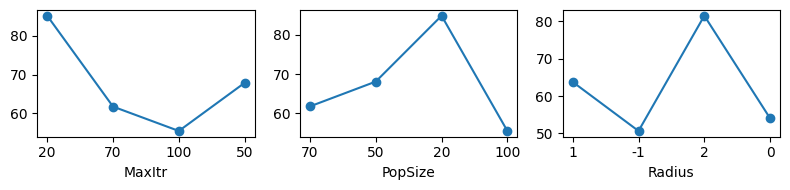

In [77]:
plt.figure(figsize=(8, 2))
k = 1
for i in Params:
    plt.subplot(1, 3, k)
    plt.plot([str(j) for j in Params[i]], Response[i], '-o')
    plt.xlabel(i)
    plt.tight_layout()
    k +=1


In [78]:
PSOResponse = pd.read_csv("PSO_Response.csv").iloc[:, 1:]

In [80]:
PSOResponse.columns = ['MaxItr', 'PopSize', 'Inertia weight', 'Personal weight', 'Global weight', 'PSO']

In [81]:
Params = {}
Response = {}
for i in PSOResponse:
    if i != 'PSO':
        Params[i] = []
        Response[i] = []
        for j in PSOResponse[i]:
            if j not in Params[i]:
                Params[i].append(j)
                Response[i].append(10 * np.log(PSOResponse[PSOResponse[i] == j].iloc[:,-1].mean()**2/\
                                PSOResponse[PSOResponse[i] == j].iloc[:,-1].std()**2))

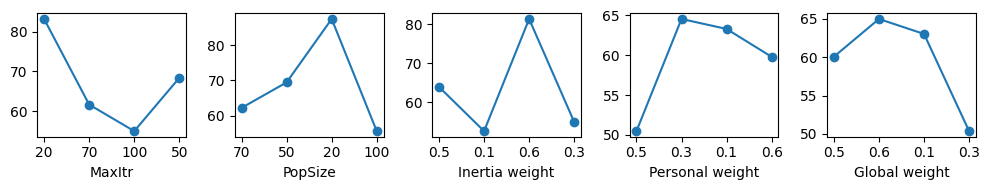

In [86]:
plt.figure(figsize=(10, 2))
k = 1
for i in Params:
    plt.subplot(1, 5, k)
    plt.plot([str(j) for j in Params[i]], Response[i], '-o')
    plt.xlabel(i)
    plt.tight_layout()
    k +=1